In [1]:
import numpy as np
import pandas as pd

In [2]:
experimentA = pd.read_csv("Survey_A.csv")

In [3]:
experimentA.head()

,Gender,Age,Race,Perfect_Pitch,Listen_Music,Played_Instruement,Years,Control,Sequance1,Sequance2,Sequance3,Sequance4,Sequance5,Sequance6
0,Male,20,Asian or Pacific Islander,No,Yes,Yes,5,Higher,Lower,Higher,Higher,Higher,Lower,Higher
1,Male,20,Asian or Pacific Islander,No,Yes,Yes,14,Higher,Higher,Lower,Higher,Higher,Higher,Higher
2,Female,20,Asian or Pacific Islander,No,Yes,Yes,15,Higher,Higher,Lower,Higher,Higher,Same,Lower
3,Male,20,White,No,Yes,No,0,Lower,Lower,Lower,Lower,Lower,Lower,Lower
4,Female,20,Asian or Pacific Islander,No,Yes,Yes,10,Higher,Lower,Lower,Higher,Higher,Lower,Lower


# Part 1: Exploratory Data Analysis

## Data Cleaning

In this experiment, participants were given a two note sequance and asked to rate whether the second note was a higher or lower pitch than the first note. This sequance was D, D#, with the correct anwser being HIGHER as D# is higher than D. Participants that failed this inital test are excluded from the analysis.

In [4]:
experimentA = experimentA[experimentA['Control'] == "Higher"]


For ease of future data analysis, the participant responses are marked as incorrect or correct.

In [5]:
experimentA.loc[(experimentA.Sequance1 != 'Higher'),'Sequance1']='Incorrect'
experimentA.loc[(experimentA.Sequance1 == 'Higher'),'Sequance1']='Correct'

experimentA.loc[(experimentA.Sequance2 != 'Lower'),'Sequance2']='Incorrect'
experimentA.loc[(experimentA.Sequance2 == 'Lower'),'Sequance2']='Correct'

experimentA.loc[(experimentA.Sequance3 != 'Higher'),'Sequance3']='Incorrect'
experimentA.loc[(experimentA.Sequance3 == 'Higher'),'Sequance3']='Correct'

experimentA.loc[(experimentA.Sequance4 != 'Higher'),'Sequance4']='Incorrect'
experimentA.loc[(experimentA.Sequance4 == 'Higher'),'Sequance4']='Correct'

experimentA.loc[(experimentA.Sequance5 != 'Higher'),'Sequance5']='Incorrect'
experimentA.loc[(experimentA.Sequance5 == 'Higher'),'Sequance5']='Correct'

experimentA.loc[(experimentA.Sequance6 != 'Lower'),'Sequance6']='Incorrect'
experimentA.loc[(experimentA.Sequance6 == 'Lower'),'Sequance6']='Correct'



experimentA.head()

,Gender,Age,Race,Perfect_Pitch,Listen_Music,Played_Instruement,Years,Control,Sequance1,Sequance2,Sequance3,Sequance4,Sequance5,Sequance6
0,Male,20,Asian or Pacific Islander,No,Yes,Yes,5,Higher,Incorrect,Incorrect,Correct,Correct,Incorrect,Incorrect
1,Male,20,Asian or Pacific Islander,No,Yes,Yes,14,Higher,Correct,Correct,Correct,Correct,Correct,Incorrect
2,Female,20,Asian or Pacific Islander,No,Yes,Yes,15,Higher,Correct,Correct,Correct,Correct,Incorrect,Correct
4,Female,20,Asian or Pacific Islander,No,Yes,Yes,10,Higher,Incorrect,Correct,Correct,Correct,Incorrect,Correct
5,Male,17,Asian or Pacific Islander,No,Yes,Yes,3,Higher,Incorrect,Correct,Incorrect,Correct,Correct,Correct


## Looking at the Big Picture

### Demographical Snapshot

Participants are first split up based on demographical data in order to surface up any abnormalities that would warrant future individual investigation. This also gives us a good picture/snapshot of the underlying distribution we are looking at. 

Note: Of all participants'response collected, gender data that were entered were either male or female. A non-binary option was avalible for participant to select, albeit no participants in our sample selected that option.

#### Male

In [6]:
experimentA_Male = experimentA[experimentA['Gender'] == "Male"]


In [7]:
#Number of Particpants
experimentA_Male.shape[0]

9

In [8]:
#Average Age
experimentA_Male[['Age']].mean()

Age    20.444444
dtype: float64

In [9]:
#Average Years of Musical Training
experimentA_Male[['Years']].mean()

Years    6.0
dtype: float64

#### Female

In [10]:
experimentA_Female = experimentA[experimentA['Gender'] == "Female"]

In [11]:
#Number of Particpants
experimentA_Female.shape[0]

6

In [12]:
#Average Age
experimentA_Female[['Age']].mean()

Age    20.0
dtype: float64

In [13]:
#Average Years of Musical Training
experimentA_Female[['Years']].mean()

Years    7.333333
dtype: float64

### Music Background Snapshot

A participant's music background is looked at. In the sample, nearly all participants reported listening to music regularly, and many have played an instrument.

#### Listened to Music?

In [14]:
#Percentage of Overall Sample that Listened to Music Regularly
experimentA[experimentA['Listen_Music'] == "Yes"].shape[0]/experimentA.shape[0]

0.9333333333333333

#### Played an instrument? FIX SPELLING

In [15]:
#Percentage of Overall Sample that Listened to Music Regularly
experimentA[experimentA['Played_Instruement'] == "Yes"].shape[0]/experimentA.shape[0]

0.9333333333333333

#### Average Years of Musical training (all samples)

In [16]:
experimentA[["Years"]].mean()

Years    6.533333
dtype: float64

### Correctness Snapshot

The proportion of correct versus incorrect responses are now looked at for each musical sequance that was played. 
A graph depicting these results are displayed.

#### Sequance 1 (Late): 27% correct
C F D D# F F# C# F D C# (C# HIGHER than C)

In [17]:
#Male
experimentA_Male[experimentA_Male['Sequance1'] == "Correct"].shape[0]/experimentA_Male.shape[0]
#Female
experimentA_Female[experimentA_Female['Sequance1'] == "Correct"].shape[0]/experimentA_Female.shape[0]
#Overall
sequance1_all = experimentA[experimentA['Sequance1'] == "Correct"].shape[0]/experimentA.shape[0] * 100


In [18]:
sequance1_all

26.666666666666668

#### Sequance 2 (Early): 
E F D D# F F# C# F D D# (D# LOWER than E)

In [19]:
#Male
experimentA_Male[experimentA_Male['Sequance2'] == "Correct"].shape[0]/experimentA_Male.shape[0]
#Female
experimentA_Female[experimentA_Female['Sequance2'] == "Correct"].shape[0]/experimentA_Female.shape[0]
#Overall
sequance2_all = experimentA[experimentA['Sequance2'] == "Correct"].shape[0]/experimentA.shape[0] * 100

In [20]:
sequance2_all

93.33333333333333

#### Sequance 3 (Precise Metric Position):
D F D D# F F# C# F D D# (D# HIGHER than D)    

In [21]:
#Male
experimentA_Male[experimentA_Male['Sequance3'] == "Correct"].shape[0]/experimentA_Male.shape[0]
#Female
experimentA_Female[experimentA_Female['Sequance3'] == "Correct"].shape[0]/experimentA_Female.shape[0]
#Overall
sequance3_all = experimentA[experimentA['Sequance3'] == "Correct"].shape[0]/experimentA.shape[0] * 100 

In [22]:
sequance3_all

60.0

#### Sequance 4 (Very Early):
E F D D# F F# C# F D F (F HIGHER than E) 

In [23]:
#Male
experimentA_Male[experimentA_Male['Sequance4'] == "Correct"].shape[0]/experimentA_Male.shape[0]
#Female
experimentA_Female[experimentA_Female['Sequance4'] == "Correct"].shape[0]/experimentA_Female.shape[0]
#Overall
sequance4_all = experimentA[experimentA['Sequance4'] == "Correct"].shape[0]/experimentA.shape[0] *100 

In [24]:
sequance4_all

66.66666666666666

#### Sequance 5 (Irregular Temporal Context):
D C E B E E D F E C# D# (D# HIGHER than D)

In [25]:
#Male
experimentA_Male[experimentA_Male['Sequance5'] == "Correct"].shape[0]/experimentA_Male.shape[0]
#Female
experimentA_Female[experimentA_Female['Sequance5'] == "Correct"].shape[0]/experimentA_Female.shape[0]
#Overall
sequance5_all = experimentA[experimentA['Sequance5'] == "Correct"].shape[0]/experimentA.shape[0] *100 

In [26]:
sequance5_all

33.33333333333333

#### Sequance 6 (Very Late):
F F D D# F F# C# F D E (E LOWER than F) 

In [27]:
#Male
experimentA_Male[experimentA_Male['Sequance6'] == "Correct"].shape[0]/experimentA_Male.shape[0]
#Female
experimentA_Female[experimentA_Female['Sequance6'] == "Correct"].shape[0]/experimentA_Female.shape[0]
#Overall
sequance6_all = experimentA[experimentA['Sequance6'] == "Correct"].shape[0]/experimentA.shape[0] *100

In [28]:
sequance6_all

66.66666666666666

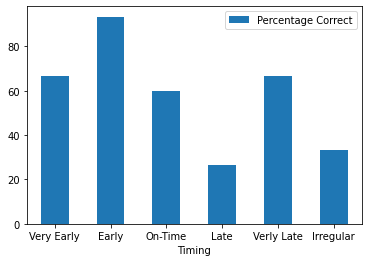

In [29]:
experimentA_all_bar = pd.DataFrame({'Timing':['Very Early', 'Early', 'On-Time','Late','Verly Late','Irregular'], 'Percentage Correct':[sequance4_all,sequance2_all,sequance3_all,sequance1_all,sequance6_all,sequance5_all]})
ax = experimentA_all_bar.plot.bar(x='Timing', y='Percentage Correct', rot=0)



# Part 2 Data Analysis:


## Hypothesis (A/B) Testing:
Null: The timing of the comparison tone (the last note) relatively to the distracting tones (notes in the middle)
does not affect a participants performance in determining if the comparison tone is higher/lower/same in pitch
than than the standard tone.

In [30]:
test_statistics = []
sampling_array = np.append(experimentA["Sequance1"].array,experimentA["Sequance2"].array)
sampling_array = np.append(sampling_array,experimentA["Sequance3"].array)
sampling_array = np.append(sampling_array,experimentA["Sequance4"].array)
sampling_array = np.append(sampling_array,experimentA["Sequance5"].array)
sampling_array = np.append(sampling_array,experimentA["Sequance6"].array)




In [31]:
def observerd_statistic_cacl(seq1,seq2=None,general=True):
    if general == True:
        sequance_test = experimentA[seq1].values
        a = np.count_nonzero(sampling_array == "Correct")/len(sampling_array)
        b = np.count_nonzero(sequance_test == "Correct")/len(sequance_test)
        return b - a
    else:
        sequance_test_1 = experimentA[seq1].values
        sequance_test_2 = experimentA[seq2].values
        a = np.count_nonzero(sequance_test_1 =="Correct")/len(sequance_test_1)
        b = np.count_nonzero(sequance_test_2=="Correct")/len(sequance_test_2)
        return b-a
    

In [32]:
def a_b_test(seq):
    ##Calculates the test statistic between a sequance and general distribution.
    sequance_test = experimentA[seq].sample(n=experimentA.shape[0],replace=True).values
    general_test = np.random.choice(sampling_array,size=experimentA.shape[0],replace=True)

    #Pecent correct in specific sequanfe distribution
    unique, counts = np.unique(sequance_test, return_counts=True)
    result = dict(zip(unique, counts))
    try:
        percent_correct_sequance = result['Correct']/len(sequance_test)
    except:
        percent_correct_sequance = 0

    #Percent correct in overall distribution    
    unique1, counts1 = np.unique(general_test, return_counts=True)
    result1 = dict(zip(unique1, counts1))
    try:
        percent_correct_general = result1['Correct']/len(general_test)
    except:
        percent_correct_general = 0

    
    #Calculate test statistic (percent correct sequance - percent correct general distribution)
    test_statistic = percent_correct_sequance-percent_correct_general
   
    return np.array([test_statistic])
    


In [33]:
def a_b_test_special(seq1,seq2):
    ##Calculates the test statistic between two sequances.
    ##Statistic is seq2_correct - seq1_correct
    sequance1_test = experimentA[seq1].sample(n=experimentA.shape[0],replace=True).values
    sequance2_test = experimentA[seq2].sample(n=experimentA.shape[0],replace=True).values

    #Pecent correct in sequance1 distribution
    unique, counts = np.unique(sequance1_test, return_counts=True)
    result = dict(zip(unique, counts))
    try:
        percent_correct_sequance1 = result['Correct']/len(sequance1_test)
    except:
        percent_correct_sequance1 = 0
        
    
    #Pecent correct in sequance2 distribution
    unique, counts = np.unique(sequance2_test, return_counts=True)
    result = dict(zip(unique, counts))
    try:
        percent_correct_sequance2 = result['Correct']/len(sequance2_test)
    except:
        percent_correct_sequance2 = 0
        

    #Calculate test statistic (percent correct sequance1 - percent correct sequance2)
    test_statistic = percent_correct_sequance2-percent_correct_sequance1
   
    return np.array([test_statistic])

#### Sequance 1: (Late)

C F D D# F F# C# F D C# (C# HIGHER than C)


In [34]:
observed_statistic = observerd_statistic_cacl("Sequance1")
print(observed_statistic)
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequance1")))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000


-0.31111111111111106


In [35]:
observed_statistic = observerd_statistic_cacl("Sequance1","Sequance4",general=True)
print(observed_statistic)
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test_special("Sequance1","Sequance4")))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value

-0.31111111111111106


0.0

#### Sequance 2 (Early):

E F D D# F F# C# F D D# (D# LOWER than E)


In [36]:
observed_statistic = observerd_statistic_cacl("Sequance2")
print(observed_statistic)
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequance2")))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value

0.3555555555555556


0.53

#### Sequance 3 (Precise Metric Position):

D F D D# F F# C# F D D# (D# HIGHER than D)


In [37]:
observed_statistic = observerd_statistic_cacl("Sequance3")
print(observed_statistic)
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequance3")))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value

0.022222222222222254


0.546

#### Sequance 4 (Very Early):

E F D D# F F# C# F D F (F HIGHER than E)


In [38]:
observed_statistic = observerd_statistic_cacl("Sequance4")
print(observed_statistic)
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequance4")))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value

0.0888888888888889


0.534

#### Sequance 5 (Irregular Temporal Context):

D C E B E E D F E C# D# (D# HIGHER than D)


In [39]:
observed_statistic = observerd_statistic_cacl("Sequance5")
print(observed_statistic)
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequance5")))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value

-0.2444444444444444


0.54

In [40]:
observed_statistic = observerd_statistic_cacl("Sequance5","Sequance3",general=True)
print(observed_statistic)
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test_special("Sequance5","Sequance3")))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value

-0.2444444444444444


0.006

### Sequance 6 (Very Late):¶

F F D D# F F# C# F D E (E LOWER than F)


In [41]:
observed_statistic = observerd_statistic_cacl("Sequance6")
print(observed_statistic)
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test("Sequance6")))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value

0.0888888888888889


0.546

In [42]:
observed_statistic = observerd_statistic_cacl("Sequance6","Sequance3",general=True)
print(observed_statistic)
test_statistics = np.array([])
for i in range(0,1000):
    test_statistics = np.concatenate((test_statistics,a_b_test_special("Sequance6","Sequance3")))
    
p_value = np.count_nonzero(test_statistics <= observed_statistic)/1000
p_value

0.0888888888888889


0.819